In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def myBlackScholes(r, sigma, x_0, x_t, K, T, M, N):
  # Comput the parameters
  dx = (x_t - x_0) / M
  dt = T / N
  u = lambda p: 0.25 * dt * ((sigma**2 * p**2) - (r * p))
  v = lambda p: 0.5 * dt * ((sigma**2 * p**2) + r)
  w = lambda p: 0.25 * dt * ((sigma**2 * p**2) + (r * p))

  # Initialize matrices
  V = np.zeros((M+1, N+1))
  X = np.arange(0, M+1) * dx
  t = np.arange(0, N+1) * dt

  # Set boundary conditions
  V[:, -1] = np.maximum(X - K, 0)
  V[1, :] = 0
  V[-1, :] = np.max(X) - (K * np.exp(-r * (T - t)))

  # Initialize A as a zero matrix
  A = np.zeros((M-1, M-1))
  # Set diagonal elements
  A[np.arange(M-1), np.arange(M-1)] = 1 + v(np.arange(1, M))
  # Set elements below the main diagonal
  A[np.arange(1, M-1), np.arange(M-2)] = -u(np.arange(2, M))
  # Set elements above the main diagonal
  A[np.arange(M-2), np.arange(1, M-1)] = -w(np.arange(1, M-1))

  # Initialize B as a zero matrix
  B = np.zeros((M-1, M-1))
  # Set diagonal elements
  B[np.arange(M-1), np.arange(M-1)] = 1 - v(np.arange(1, M))
  # Set elements below the main diagonal
  B[np.arange(1, M-1), np.arange(M-2)] = u(np.arange(2, M))
  # Set elements above the main diagonal
  B[np.arange(M-2), np.arange(1, M-1)] = w(np.arange(1, M-1))

  # Loop for implicit option prices
  for n in range(N, 0, -1):
    # Boundary set for previous time
    b = np.zeros(M-1)
    b[0] = -u(1) * V[0, n]
    b[-1] = -w(M-1) * V[-1, n]

    # Boundary set for current time
    c = np.zeros(M-1)
    c[0] = u(1) * V[0, n]
    c[-1] = w(M-1) * V[-1, n]

    # Solve for previous time
    V[1:M, n-1] = np.linalg.solve(A, np.dot(B, V[1:M, n]) + c - b)

  return V, X, t

In [3]:
# Constant parameters
rate = 0.05;
volatility = 0.3;
X_grid = 80;
T_grid = 80;
Xmax = 200;
Xmin = 0;
expiry_time = 4;
strike = 100;

# Calculate call option prices given the parameters
V, X, t = myBlackScholes(rate, volatility, Xmin, Xmax, strike, expiry_time, X_grid, T_grid)

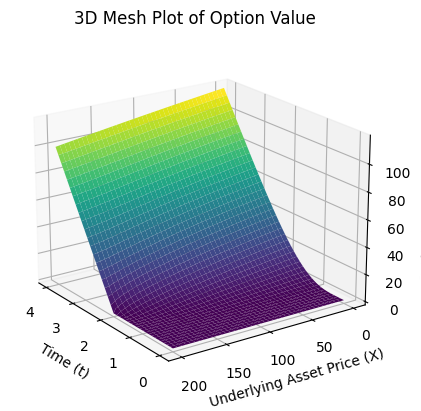

In [4]:
# Create a meshgrid for t and X
T, X = np.meshgrid(t, X)
Z = V.T

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D mesh
ax.plot_surface(T, X, Z, cmap='viridis')  # Transpose V to match the dimensions

# Set labels
ax.set_xlabel('Time (t)')
ax.set_ylabel('Underlying Asset Price (X)')
ax.set_zlabel('Option Value (V)')

# Change the viewing angle to appear as if the x-axis is rotated
ax.view_init(elev=20, azim=-215)  # Adjust the 'azim' value to change the azimuth angle

plt.title('3D Mesh Plot of Option Value')
plt.show()